# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

#ML Modelling
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
train_df = pd.read_csv('twitter_training.csv', names=col_names)
test_df = pd.read_csv('twitter_validation.csv', names=col_names)

In [ ]:
train_df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
test_df

,ID,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
train_df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [ ]:
train_df.dropna(subset=['Content'], inplace=True)
train_df['Sentiment'] = train_df['Sentiment'].replace('Irrelevant', 'Neutral')
test_df['Sentiment'] = test_df['Sentiment'].replace('Irrelevant', 'Neutral')

In [ ]:
sentiment_counts = train_df['Sentiment'].value_counts().sort_index()
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']
fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
values=sentiment_counts.values,
textinfo='percent+value+label',
marker_colors=sentiment_colors,
textposition='auto',
hole=.3)])
fig.update_layout(
title_text='Sentiment Distribution',
template='plotly_white',
xaxis=dict(
title='Sources',
 ),
yaxis=dict(
title='Number of Posts in Twitter',
 )
)
fig.update_traces(marker_line_color='black',
marker_line_width=1.5,
opacity=0.8)
fig.show()


In [ ]:
top10_entity_counts = train_df['Entity'].value_counts().sort_values(ascending=False)[:10]
fig = px.bar(x=top10_entity_counts.index,
 y=top10_entity_counts.values,
 color=top10_entity_counts.values,
 text=top10_entity_counts.values,
 color_continuous_scale='Blues')
fig.update_layout(
 title_text='Top 10 Twitter Entity Distribution',
 template='plotly_white',
 xaxis=dict(
 title='Entity',
 ),
 yaxis=dict(
 title='Number of Posts in Twitter',
 )
)
fig.update_traces(marker_line_color='black',
 marker_line_width=1.5,
 opacity=0.8)
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top3_entity_df = train_df['Entity'].value_counts().sort_values(ascending=False)[:3]
top3_entity = top3_entity_df.index.tolist()
sentiment_by_entity = train_df.loc[train_df['Entity'].isin(top3_entity)].groupby('Entity')['Sentiment'].value_counts()
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']
row_n = 1
col_n = 3
fig = make_subplots(rows=row_n, cols=col_n,
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=top3_entity)

for i, col in enumerate(top3_entity):
    fig.add_trace(
        go.Pie(labels=sentiment_labels,
               values=sentiment_by_entity[col].values,
               textinfo='percent+value+label',
               marker=dict(colors=sentiment_colors),  # Use marker instead of marker_colors
               textposition='auto',
               name=col),
        row=int(i/col_n)+1, col=int(i%col_n)+1)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()

In [ ]:
# Load the training dataset
train_data = pd.read_csv('/content/twitter_training.csv')

# Load the validation dataset
validation_data = pd.read_csv('/content/twitter_validation.csv')

# Combine both datasets for analysis
data = pd.concat([train_data, validation_data], ignore_index=True)


In [ ]:
data.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        # Remove special characters, links, and unnecessary spaces
        cleaned_text = " ".join(re.sub(r"[^a-zA-Z0-9\s]", " ", text).split())
        return cleaned_text
    else:
        return ""

# Apply data cleaning to the specified column
data['cleaned_text'] = data['im getting on borderlands and i will murder you all ,'].apply(clean_text)


In [ ]:
from textblob import TextBlob
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def get_sentiment_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

data['sentiment_polarity'] = data['cleaned_text'].apply(get_sentiment_polarity)
data['sentiment_subjectivity'] = data['cleaned_text'].apply(get_sentiment_subjectivity)

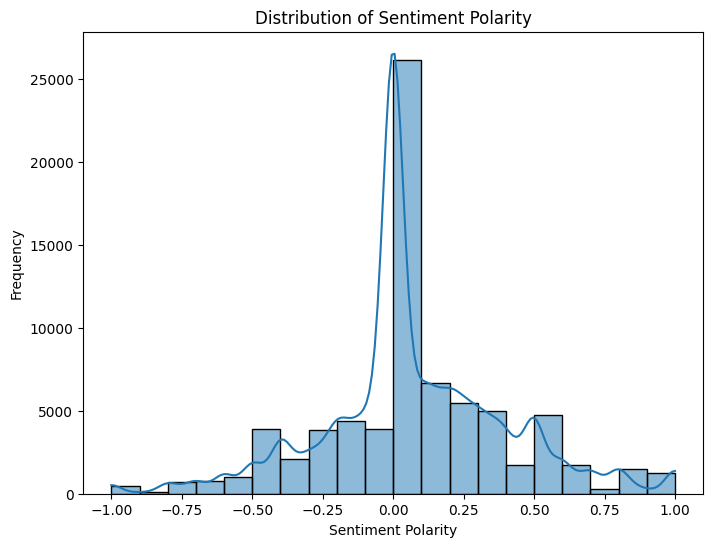

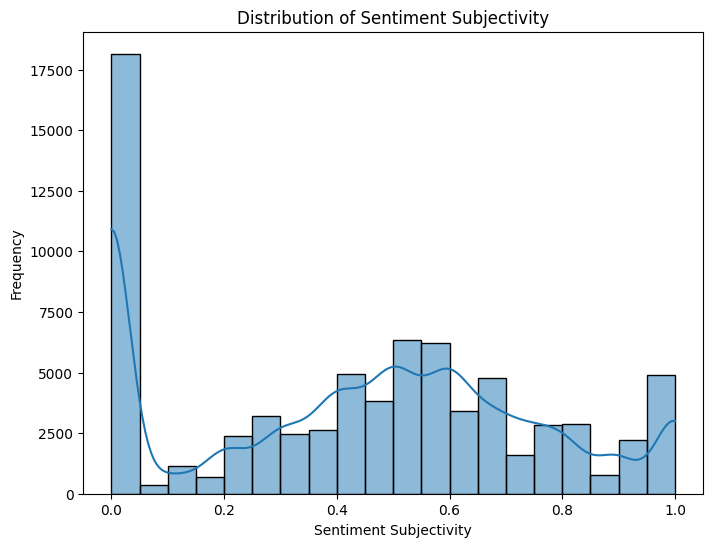

In [ ]:
# Visualization
# Plot the distribution of sentiment polarity
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment_polarity'], bins=20, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()

# Plot the distribution of sentiment subjectivity
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment_subjectivity'], bins=20, kde=True)
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Subjectivity')
plt.show()
